In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

Importing the dataset

In [94]:
#importing the dataset from the url
df = "https://ontario.ca/v1/files/fuel-prices/pumppricesall.csv"
data = pd.read_csv(df)

#renaming the columns for better understanding
data.columns= ["Date", "Pump Price", "Crude Cost", "Federal Excise Tax", "Federal Carbon Tax", " Ontario Tax", "GST/HST", "Wholesale Margin", "Retail Margin", "Region"]

# Only using Toronto Data from the dataset 
toronto_data = data[data["Region"] == "Toronto"]

Cleaning the data

In [99]:

# Check for missing values and handle them if needed
toronto_data = toronto_data.dropna()

# Remove leading and trailing spaces from column names
data.columns = data.columns.str.strip()

# Convert the "Date" column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Verify the changes
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                536 non-null    datetime64[ns]
 1   Pump Price          536 non-null    float64       
 2   Crude Cost          536 non-null    float64       
 3   Federal Excise Tax  536 non-null    float64       
 4   Federal Carbon Tax  536 non-null    float64       
 5   Ontario Tax         536 non-null    float64       
 6   GST/HST             536 non-null    float64       
 7   Wholesale Margin    536 non-null    float64       
 8   Retail Margin       536 non-null    float64       
 9   Region              536 non-null    object        
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 42.0+ KB
None
        Date  Pump Price  Crude Cost  Federal Excise Tax  Federal Carbon Tax  \
0 1987-01-01        43.1        13.4                 4.5          

Descriptive stats for Toronto

In [104]:
toronto_numeric_data = toronto_data.drop(columns=["Date", "Region"])
toronto_numeric_data.describe()

,Pump Price,Crude Cost,Federal Excise Tax,Federal Carbon Tax,Ontario Tax,GST/HST,Wholesale Margin,Retail Margin
count,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000
mean,89.135683,35.542952,9.499119,1.466079,13.752643,8.073789,14.882159,5.924449
std,35.196294,19.598960,1.105255,3.877033,2.032154,5.289762,8.458015,2.562964
min,43.100000,10.300000,4.500000,0.000000,8.300000,3.100000,3.400000,-2.300000
25%,55.200000,16.000000,10.000000,0.000000,14.700000,3.600000,7.900000,4.100000
50%,84.900000,33.050000,10.000000,0.000000,14.700000,4.800000,11.600000,6.100000
75%,116.900000,50.050000,10.000000,0.000000,14.700000,13.300000,21.075000,7.500000
max,207.200000,95.300000,10.000000,17.600000,14.700000,23.800000,44.700000,12.300000


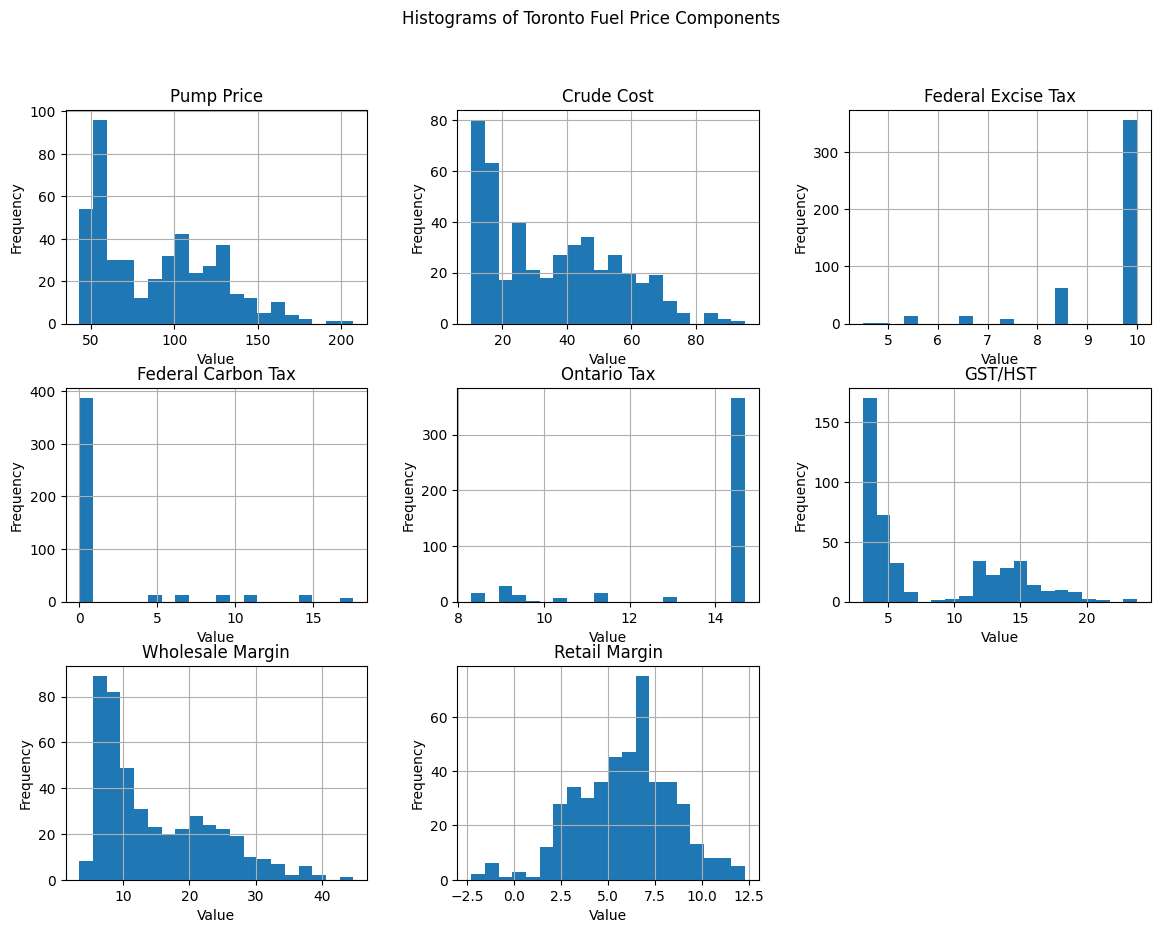

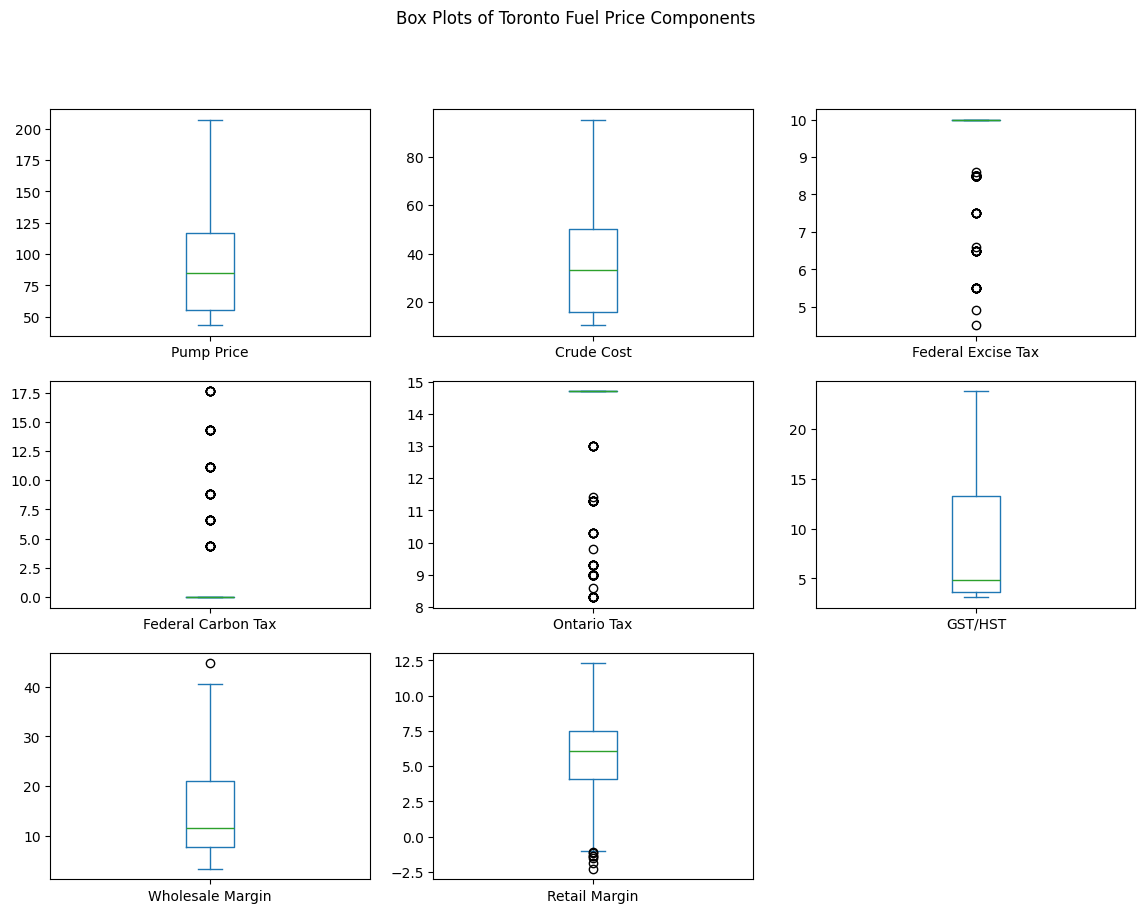

In [ ]:
# Histograms
axes = toronto_numeric_data.hist(bins=20, figsize=(14, 10))

# Set labels for each histogram
for ax in axes.flatten():
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

plt.suptitle('Histograms of Toronto Fuel Price Components')
plt.show()

# Box plots
toronto_numeric_data.plot(kind='box', subplots=True, layout=(3, 3), figsize=(14, 10), sharex=False, sharey=False)
plt.suptitle('Box Plots of Toronto Fuel Price Components')
plt.show()

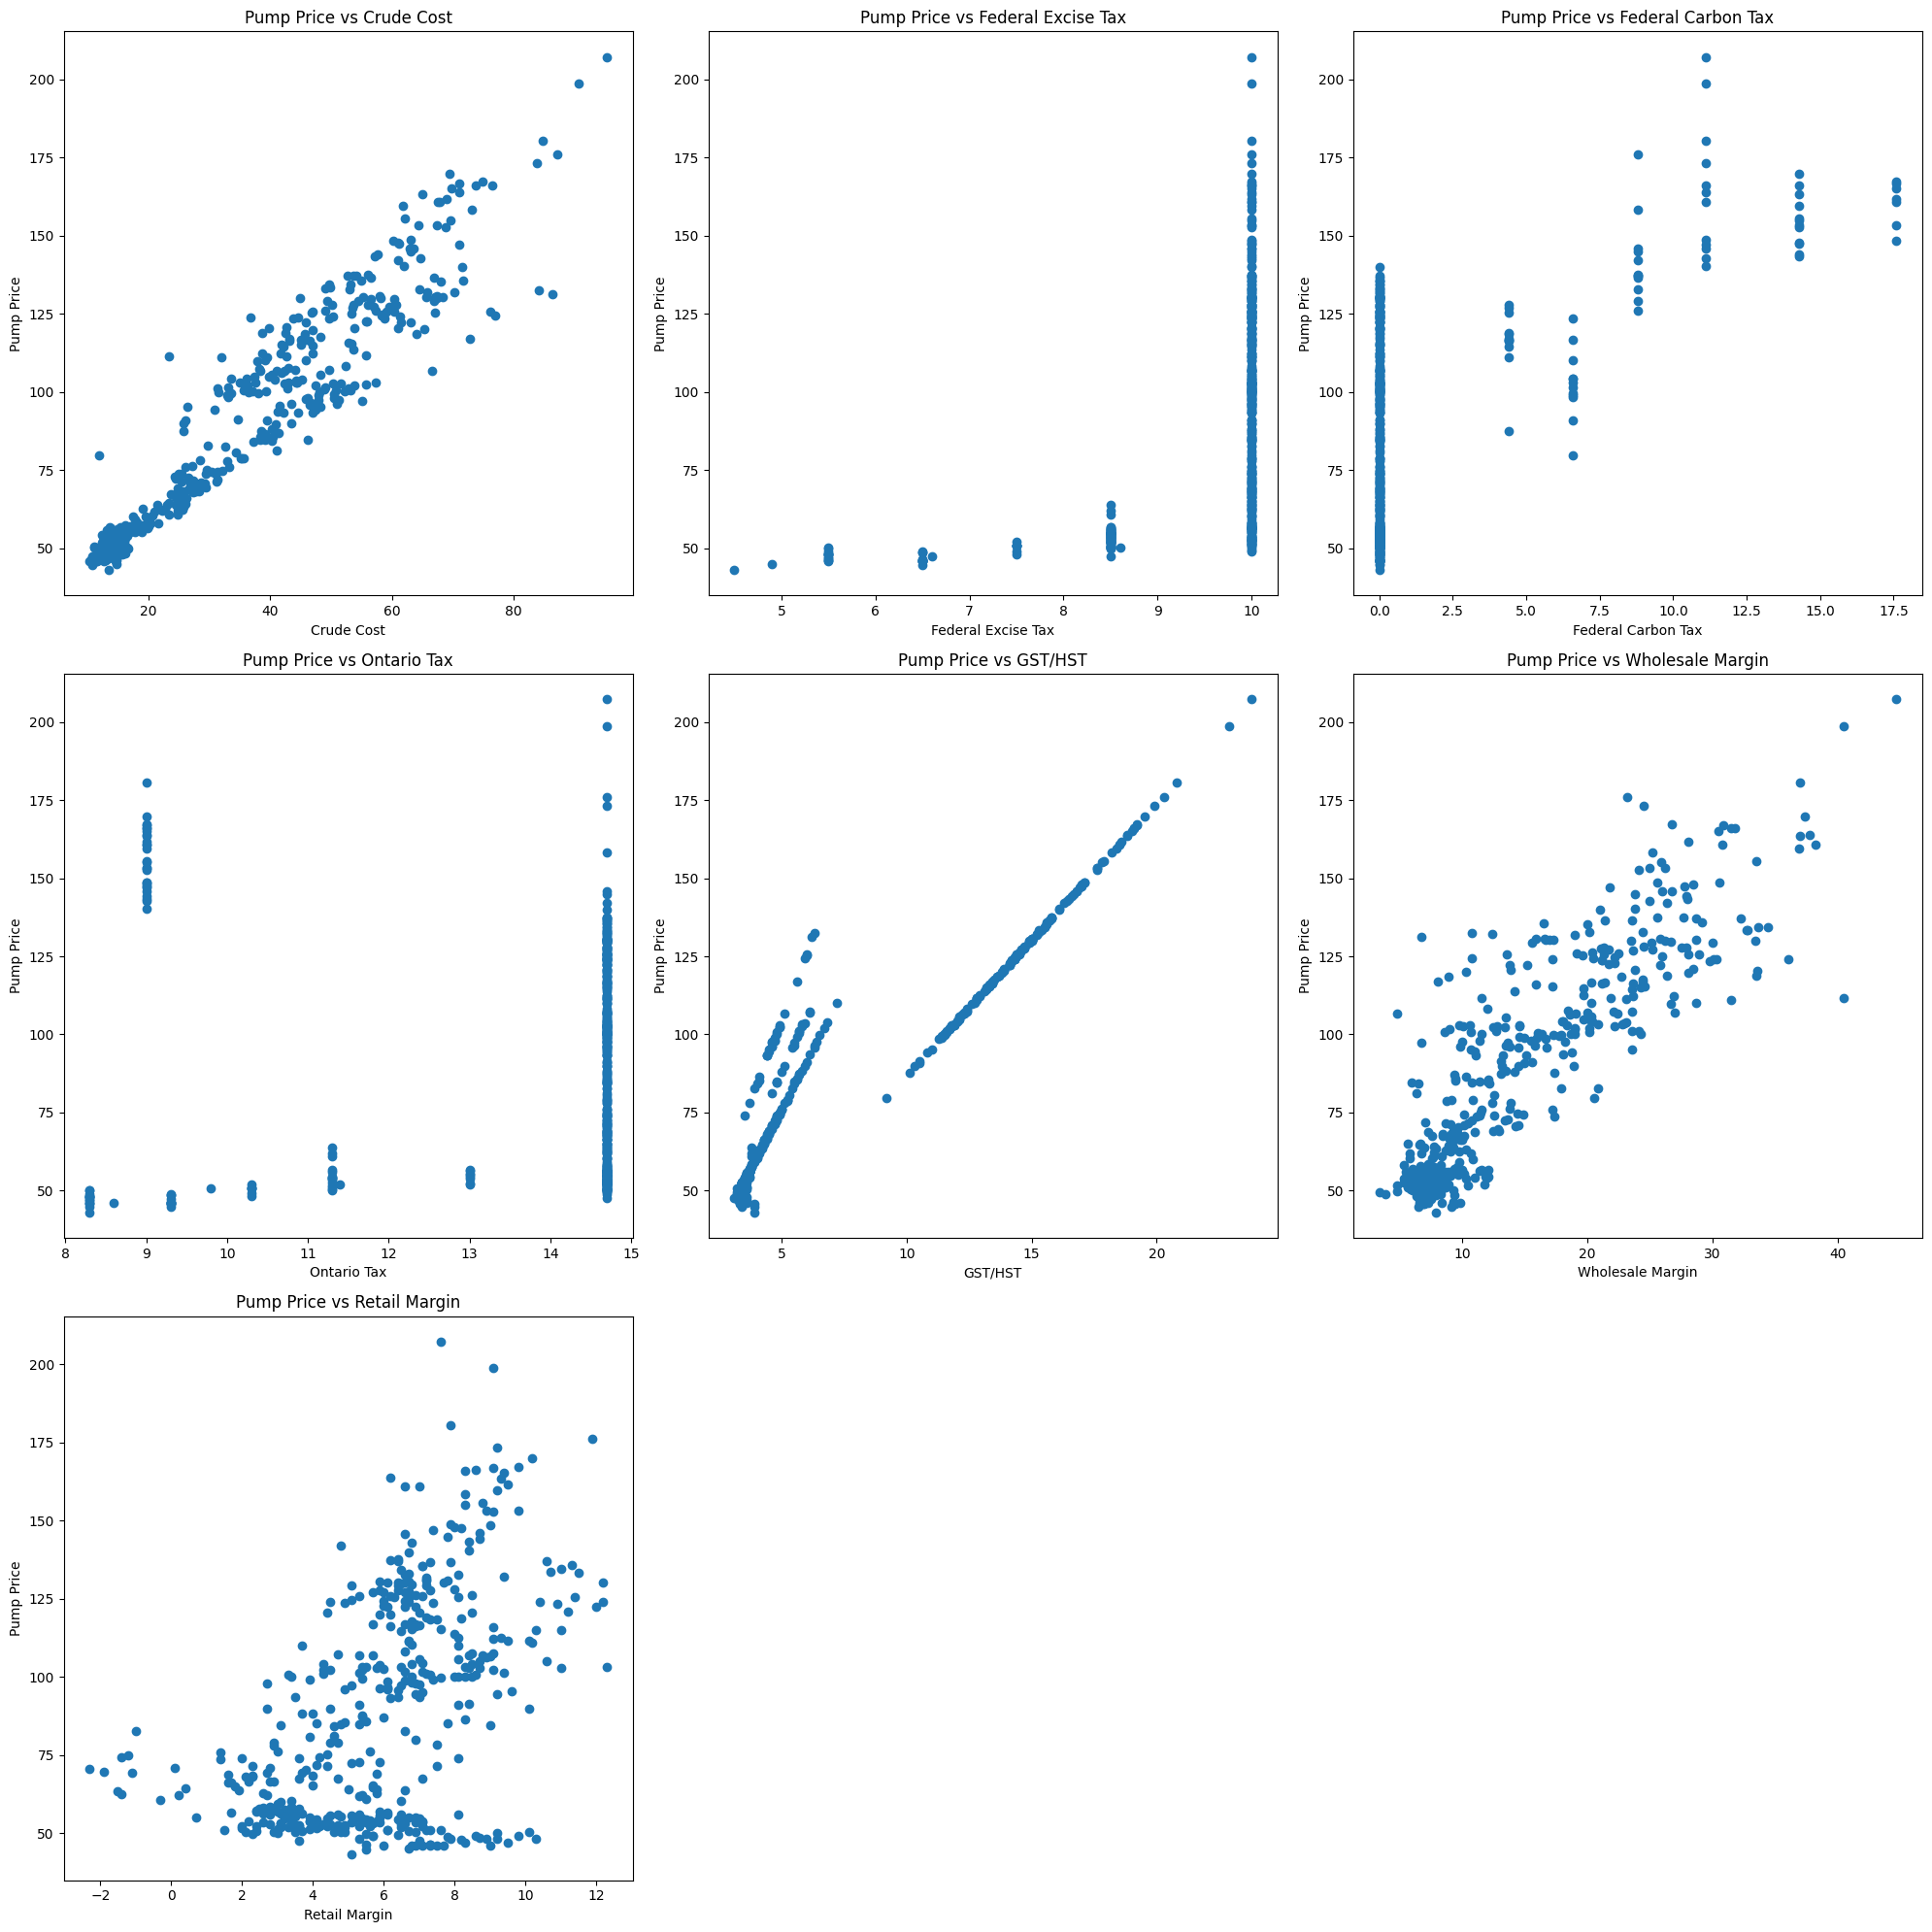

In [73]:
# List of columns to compare with Pump Price
columns_to_compare = ["Crude Cost", "Federal Excise Tax", "Federal Carbon Tax", "Ontario Tax", "GST/HST", "Wholesale Margin", "Retail Margin"]

# Create scatter plots
plt.figure(figsize=(20, 20))

for i, column in enumerate(columns_to_compare):
    plt.subplot(3, 3, i + 1)
    plt.scatter(toronto_numeric_data[column], toronto_numeric_data["Pump Price"])
    plt.xlabel(column)
    plt.ylabel("Pump Price")
    plt.title("Pump Price vs " + column)

plt.tight_layout()
plt.show()


In [75]:
# Filter the data for Toronto region
toronto_data = data[data["Region"] == "Toronto"]

# Only using data with Toronto region and excluding the date and region columns
toronto_numeric_data = toronto_data.drop(columns=["Date", "Region"])

# Define the features and target variable
X = toronto_numeric_data.drop(columns=["Pump Price"])
y = toronto_numeric_data["Pump Price"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the features and target variable
X = toronto_numeric_data.drop(columns=["Pump Price"])
y = toronto_numeric_data["Pump Price"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [76]:

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)
lr_mae = mean_absolute_error(y_test, y_pred_lr)

print(f"Linear Regression MSE: {lr_mse}")
print(f"Linear Regression R2: {lr_r2}")
print(f"Linear Regression MAE: {lr_mae}")



Linear Regression MSE: 0.004154125802038957
Linear Regression R2: 0.9999969517476534
Linear Regression MAE: 0.04523458186491921


In [77]:
# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred_lr)

print(f"Random Forest MSE: {rf_mse}")
print(f"Random Forest R2: {rf_r2}")
print(f"Linear Regression MAE: {rf_mae}")


Random Forest MSE: 1.9960313186813123
Random Forest R2: 0.9985353339207332
Linear Regression MAE: 0.04523458186491921


In [78]:
# K-Nearest Neighbors
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
knn_mse = mean_squared_error(y_test, y_pred_knn)
knn_r2 = r2_score(y_test, y_pred_knn)
knn_mae = mean_absolute_error(y_test, y_pred_lr)
print(f"KNN MSE: {knn_mse}")
print(f"KNN R2: {knn_r2}")
print(f"Linear Regression MAE: {knn_mae}")



KNN MSE: 12.446061538461523
KNN R2: 0.9908672153661926
Linear Regression MAE: 0.04523458186491921


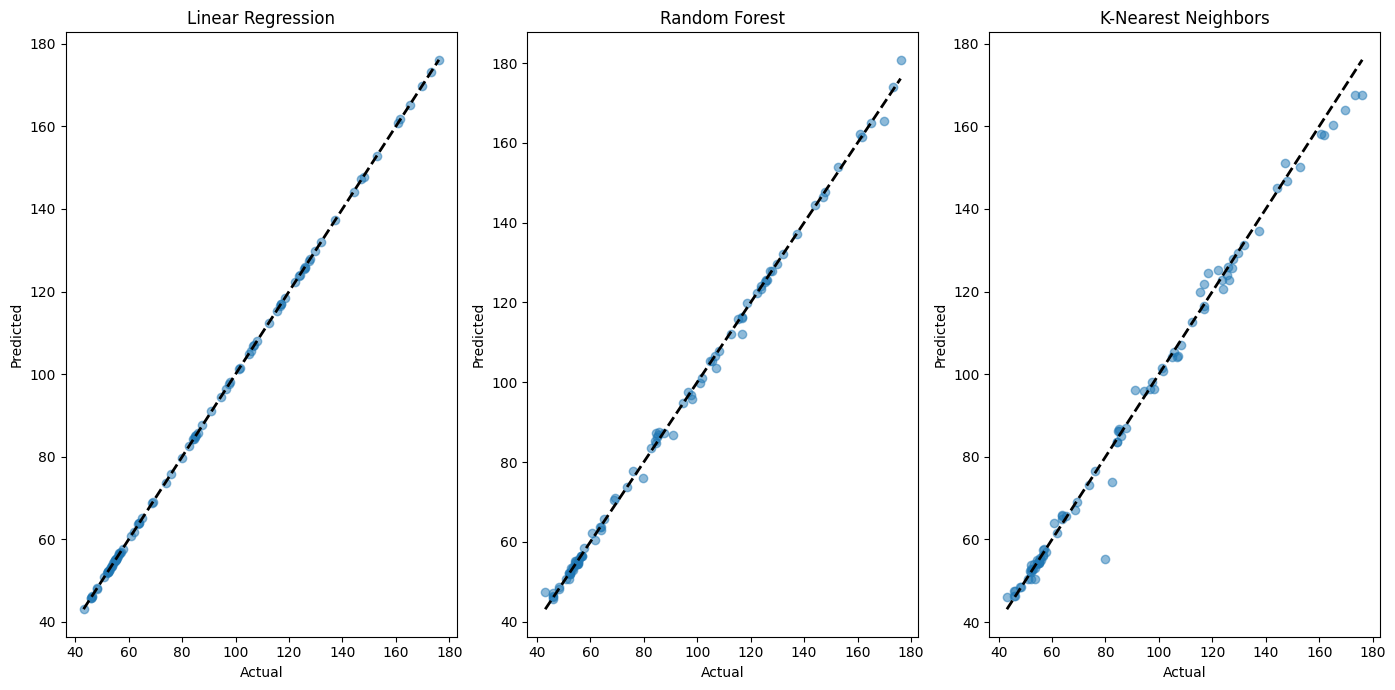

In [79]:
# Plotting the results
plt.figure(figsize=(14, 7))

# Linear Regression
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression')

# Random Forest
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest')

# K-Nearest Neighbors
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_knn, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('K-Nearest Neighbors')

plt.tight_layout()
plt.show()